In [203]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [204]:
import warnings
warnings.filterwarnings('ignore')

In [205]:
matplotlib.rcParams.update({'font.size': 14})

In [206]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
        
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [207]:
def show_dst(train_df, column):
    plt.figure(figsize = (16, 8))

    train_df[column].hist(bins=18)
    plt.ylabel('Count')
    plt.xlabel(column)

    plt.title('Target distribution')
    plt.show()
    return None

In [208]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'
PREDICTIONS_PATH = 'Natalia_Ramazanova_predictions_1.csv'

In [209]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [210]:
print(train_df.shape)
train_df.head()

(10000, 13)


,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [211]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [212]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8009,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9748,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.4400,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.7243,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3706,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1215,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1172,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0591,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0277,0.164120,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029ED1B4DEC8>,
      dtype=object)

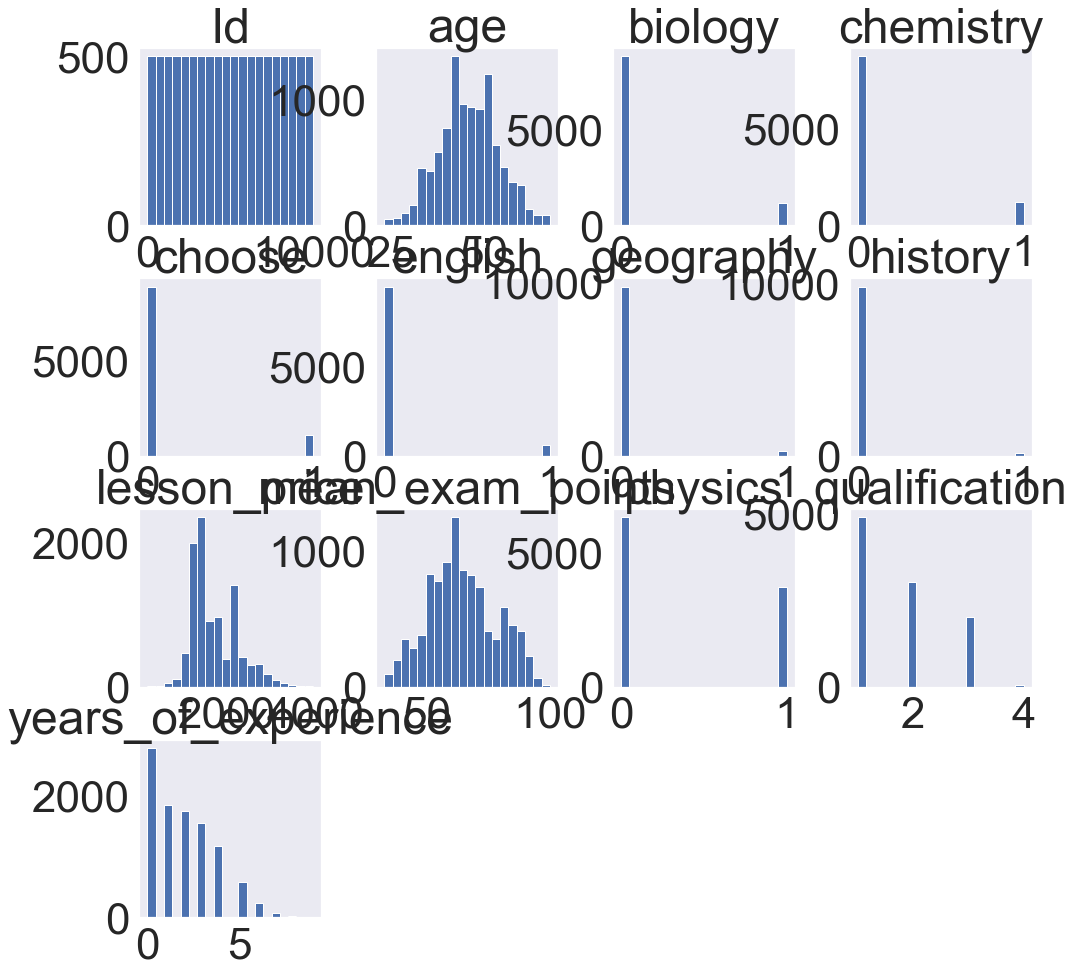

In [213]:
train_df.hist(figsize=(16,16), bins=20, grid=False)

In [214]:
print(train_df['years_of_experience'].value_counts())

0.0    2774
1.0    1842
2.0    1743
3.0    1545
4.0    1177
5.0     581
6.0     234
7.0      73
8.0      22
9.0       9
Name: years_of_experience, dtype: int64


In [215]:
print(train_df['qualification'].value_counts())

1.0    4891
2.0    3033
3.0    2018
4.0      58
Name: qualification, dtype: int64


In [216]:
print(train_df['age'].value_counts())

44.0    491
43.0    485
48.0    482
45.0    474
47.0    470
42.0    469
46.0    466
49.0    443
50.0    430
51.0    411
40.0    408
41.0    391
39.0    367
52.0    359
53.0    333
38.0    311
54.0    307
37.0    270
55.0    249
36.0    239
56.0    210
35.0    191
57.0    190
34.0    165
33.0    158
58.0    153
59.0    133
32.0    127
60.0    105
31.0     92
61.0     80
62.0     68
30.0     66
63.0     56
28.0     49
64.0     46
29.0     46
68.0     38
27.0     35
65.0     31
66.0     24
23.0     21
26.0     21
25.0     17
67.0     14
24.0      9
Name: age, dtype: int64


In [217]:
print(train_df['physics'].value_counts())
print(train_df['chemistry'].value_counts())
print(train_df['biology'].value_counts())
print(train_df['english'].value_counts())
print(train_df['geography'].value_counts())
print(train_df['history'].value_counts())

0.0    6294
1.0    3706
Name: physics, dtype: int64
0.0    8785
1.0    1215
Name: chemistry, dtype: int64
0.0    8828
1.0    1172
Name: biology, dtype: int64
0.0    9409
1.0     591
Name: english, dtype: int64
0.0    9723
1.0     277
Name: geography, dtype: int64
0.0    9820
1.0     180
Name: history, dtype: int64


In [218]:
print(train_df['lesson_price'].value_counts())

1450.0    677
1500.0    639
1200.0    614
2200.0    547
1350.0    535
         ... 
200.0       2
3700.0      2
3950.0      1
3650.0      1
450.0       1
Name: lesson_price, Length: 71, dtype: int64


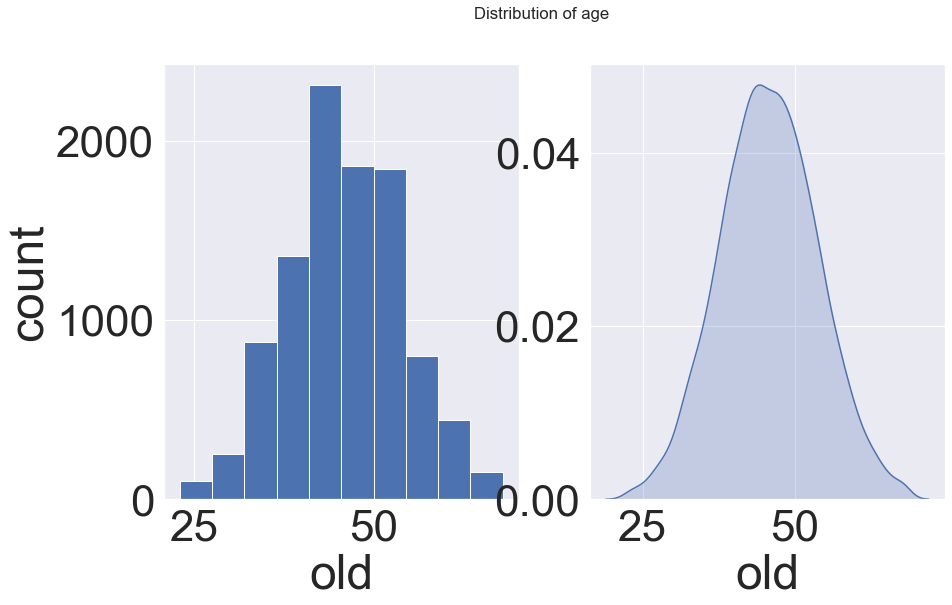

In [219]:
plt.figure(figsize = (14, 8))

plt.subplot(121)
train_df['age'].hist()
plt.ylabel('count')
plt.xlabel('old')

plt.subplot(122)
sns.kdeplot(train_df['age'], shade=True, legend=False)
plt.xlabel('old')

plt.suptitle('Distribution of age')
plt.show()

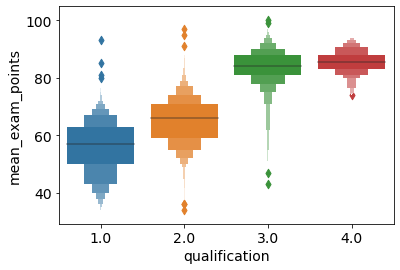

In [20]:
sns.boxenplot(train_df['qualification'],train_df['mean_exam_points'])

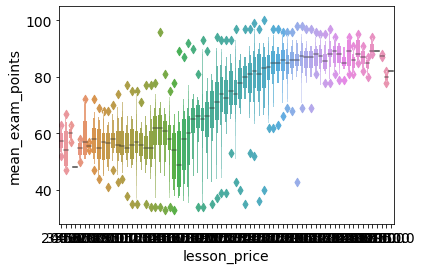

In [21]:
sns.boxenplot(train_df['lesson_price'],train_df['mean_exam_points'])

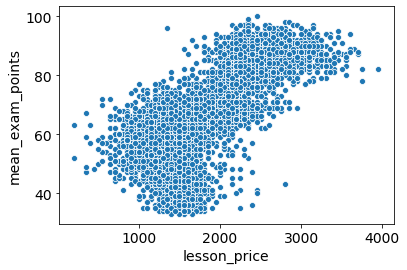

In [24]:
sns.scatterplot(train_df['lesson_price'],train_df['mean_exam_points'])

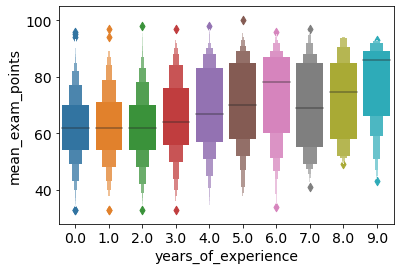

In [22]:
sns.boxenplot(train_df['years_of_experience'],train_df['mean_exam_points'])

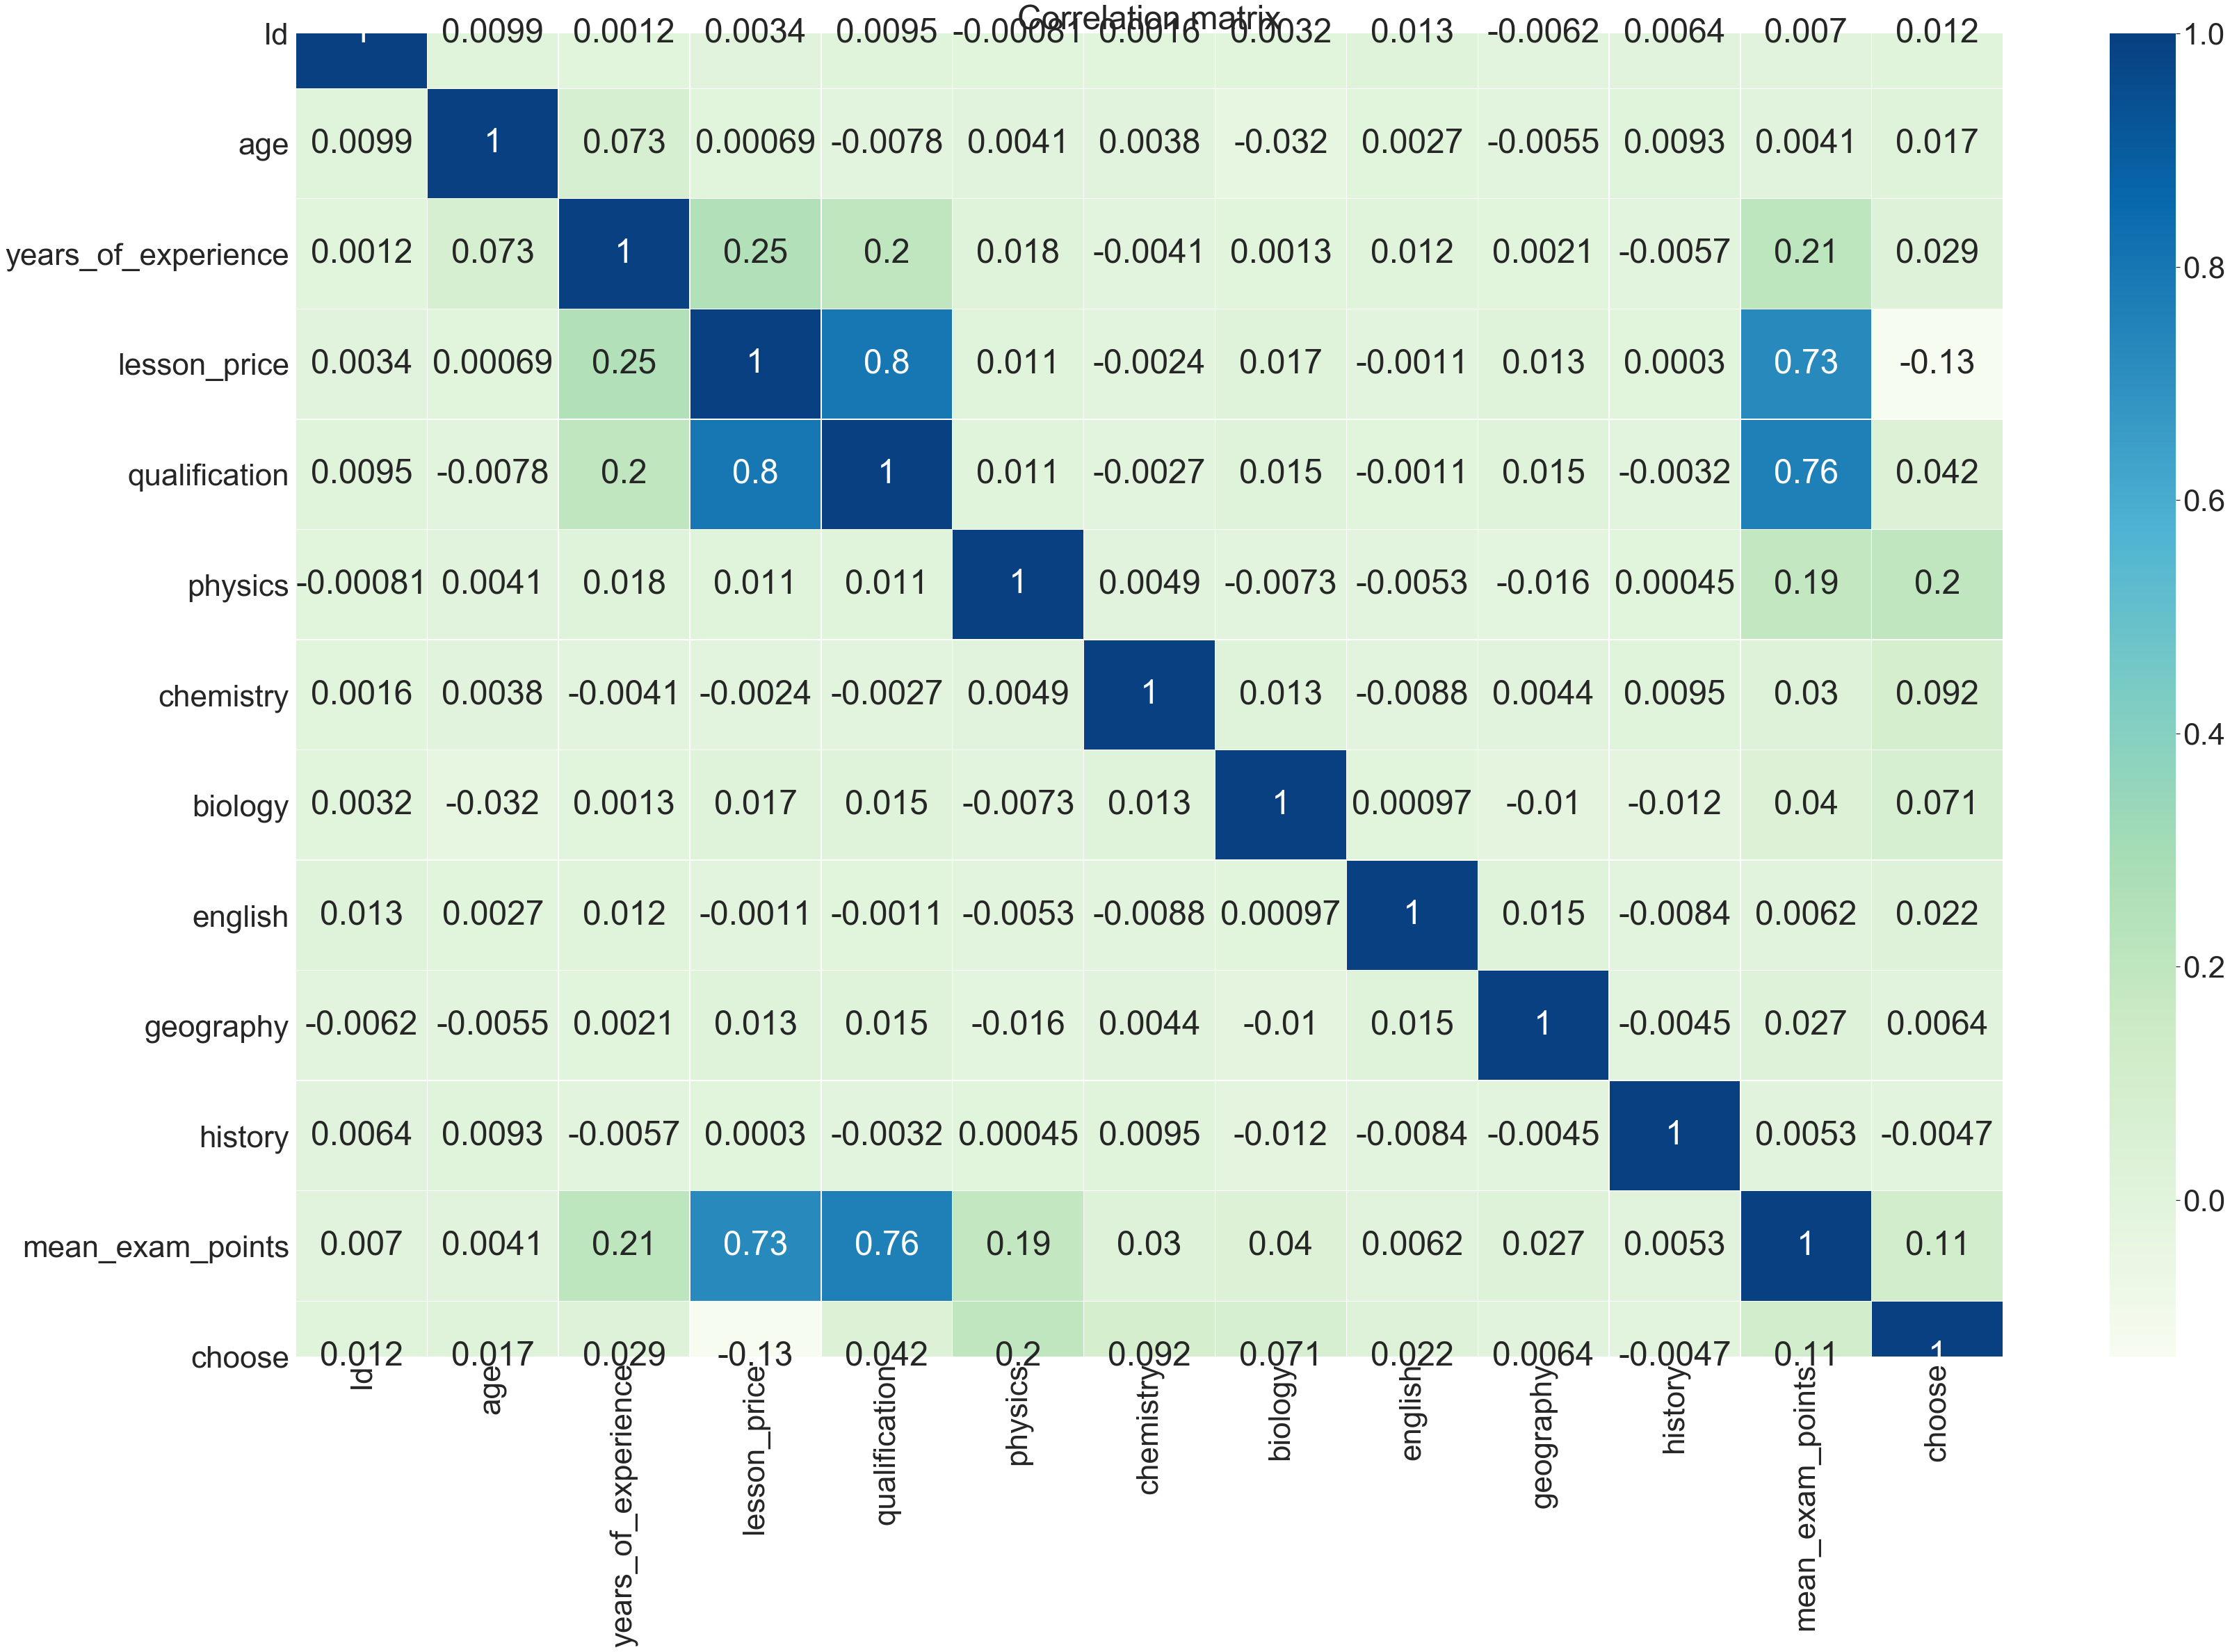

In [25]:
plt.figure(figsize = (55,35))

sns.set(font_scale=4)
sns.heatmap(train_df.corr(), annot=True, linewidths=.4, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [26]:
train_df['age_group']=pd.cut(train_df['age'],[0,40,46,51,100],labels=[1,2,3,4]).astype('float')

In [27]:
train_df['price_group']=pd.cut(train_df['lesson_price'],[0,1550,2150,10000],labels=[1,2,3]).astype('float')

In [28]:
train_df['qualification_group']=pd.cut(train_df['qualification'],[0,1,2,4],labels=[1,2,3]).astype('float')

In [29]:
train_df.loc[train_df['years_of_experience']>0,'year_age_group']=train_df.loc[train_df['years_of_experience']>0,'age']/train_df.loc[train_df['years_of_experience']>0,'years_of_experience']
train_df.loc[train_df['years_of_experience']==0,'year_age_group']=train_df.loc[train_df['years_of_experience']==0,'age']
quartiles = [train_df['year_age_group'].quantile(0),
            train_df['year_age_group'].quantile(0.25),
            train_df['year_age_group'].quantile(0.5),
            train_df['year_age_group'].quantile(0.75),
            train_df['year_age_group'].quantile(1)]
train_df['year_age_group'] = pd.cut(train_df['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')

In [30]:
quartiles_score = [train_df['mean_exam_points'].quantile(0),
             train_df['mean_exam_points'].quantile(0.25),
             train_df['mean_exam_points'].quantile(0.5),
            train_df['mean_exam_points'].quantile(0.75),
            train_df['mean_exam_points'].quantile(1)]
train_df['mean_exam_points_group']=pd.cut(train_df['mean_exam_points'],quartiles_score,labels=[1,2,3,4]).astype('float')

In [31]:
train_df.head(10)

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,age_group,price_group,qualification_group,year_age_group,mean_exam_points_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,1.0,2.0,2.0,3.0,3.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,4.0,1.0,2.0,3.0,2.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,1.0,2.0,1.0,1.0,3.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0,1.0,1.0,3.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,2.0,3.0,2.0,2.0,3.0
5,5,37.0,3.0,1050.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0,1.0,1.0,2.0,1.0,1.0
6,6,54.0,3.0,800.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,52.0,1,4.0,1.0,1.0,2.0,1.0
7,7,32.0,2.0,2750.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,95.0,0,1.0,3.0,3.0,2.0,4.0
8,8,56.0,3.0,1300.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,0,4.0,1.0,2.0,2.0,2.0
9,9,44.0,4.0,2350.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0,2.0,3.0,2.0,1.0,3.0


In [40]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.500000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.800900,8.030274,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.974800,1.766883,0.0,0.00,2.0,3.00,9.0
lesson_price,10000.0,1702.440000,523.789062,200.0,1300.00,1550.0,2150.00,3950.0
qualification,10000.0,1.724300,0.798845,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.370600,0.482990,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.121500,0.326724,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.117200,0.321675,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.059100,0.235824,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.027700,0.164120,0.0,0.00,0.0,0.00,1.0


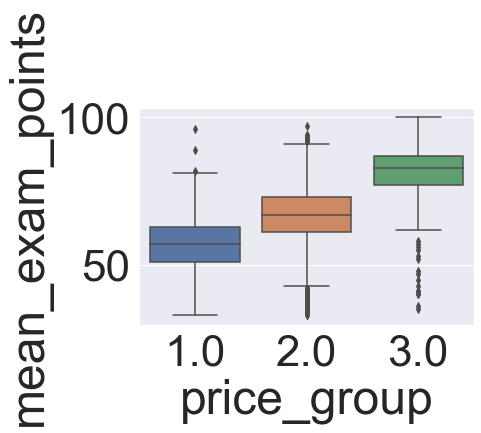

In [41]:
sns.boxplot(train_df['price_group'],train_df['mean_exam_points'],orient='v');

In [52]:
data, labels = train_df.iloc[:,1:].drop('choose',axis=1).values,train_df.iloc[:,12].values

In [53]:
data

array([[3.50e+01, 0.00e+00, 2.15e+03, ..., 3.00e+00, 3.00e+00, 0.00e+00],
       [5.20e+01, 2.00e+00, 1.25e+03, ..., 3.00e+00, 2.00e+00, 0.00e+00],
       [2.90e+01, 3.00e+00, 1.75e+03, ..., 1.00e+00, 3.00e+00, 0.00e+00],
       ...,
       [4.40e+01, 5.00e+00, 1.75e+03, ..., 1.00e+00, 2.00e+00, 0.00e+00],
       [4.10e+01, 0.00e+00, 1.70e+03, ..., 3.00e+00, 3.00e+00, 0.00e+00],
       [4.10e+01, 5.00e+00, 1.20e+03, ..., 1.00e+00, 1.00e+00, 0.00e+00]])

In [54]:
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
random.seed(42)

def get_bootstrap(labels, N):
    return np.random.randint(0, len(labels), size=(N, len(labels)))

In [170]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [115]:
# Построение дерева с помощью рекурсивной функции

def build_tree(self, data, labels, tree_depth, max_depth):
    quality, t, index = self.find_best_split(data, labels)
    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
    if tree_depth >= max_depth:
        return Leaf(data, labels)

    # Увеличиваем глубину дерева на 1
    tree_depth += 1

    true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
    false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)


In [171]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [172]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction

In [173]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    
    classes = {}
    
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [174]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [175]:

# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [176]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 1

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [177]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [178]:

def random_forest(data, labels, n_trees):
    forest = []
    bootstrap_idx = get_bootstrap(labels, n_trees)
    
    for idx in bootstrap_idx: 
        b_data, b_labels = data[idx], labels[idx]
        forest.append(build_tree(b_data, b_labels))
    
    return forest

In [179]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [180]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [181]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [185]:
# Разобьем выборку на обучающую и тестовую

from sklearn import model_selection

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, 
                                                                                     labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 42)

In [186]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [187]:
tree_list = [1, 3, 10, 50, 70, 100, 200]

In [188]:
for i in tree_list:
    n_trees = i
    my_forest = random_forest(train_data, train_labels, n_trees)
    # Получим ответы для обучающей выборки 
    train_answers = tree_vote(my_forest, train_data)
    # И получим ответы для тестовой выборки
    test_answers = tree_vote(my_forest, test_data)
    # Точность на обучающей выборке
    train_accuracy = accuracy_metric(train_labels, train_answers)
    print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')
    # Точность на тестовой выборке
    test_accuracy = accuracy_metric(test_labels, test_answers)
    print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')

Точность случайного леса из 1 деревьев на обучающей выборке: 92.614
Точность случайного леса из 1 деревьев на тестовой выборке: 83.633
Точность случайного леса из 3 деревьев на обучающей выборке: 94.971
Точность случайного леса из 3 деревьев на тестовой выборке: 87.800
Точность случайного леса из 10 деревьев на обучающей выборке: 95.329
Точность случайного леса из 10 деревьев на тестовой выборке: 89.500
Точность случайного леса из 50 деревьев на обучающей выборке: 96.386
Точность случайного леса из 50 деревьев на тестовой выборке: 89.267
Точность случайного леса из 70 деревьев на обучающей выборке: 96.314
Точность случайного леса из 70 деревьев на тестовой выборке: 89.667
Точность случайного леса из 100 деревьев на обучающей выборке: 96.286
Точность случайного леса из 100 деревьев на тестовой выборке: 89.333
Точность случайного леса из 200 деревьев на обучающей выборке: 96.471
Точность случайного леса из 200 деревьев на тестовой выборке: 89.533


In [220]:
test_df['age_group']=pd.cut(test_df['age'],[0,40,46,51,100],labels=[1,2,3,4]).astype('float')

In [221]:
test_df['price_group']=pd.cut(test_df['lesson_price'],[0,1550,2150,10000],labels=[1,2,3]).astype('float')

In [222]:
test_df['qualification_group']=pd.cut(test_df['qualification'],[0,1,2,4],labels=[1,2,3]).astype('float')

In [223]:
test_df.loc[test_df['years_of_experience']>0,'year_age_group']=test_df.loc[test_df['years_of_experience']>0,'age']/test_df.loc[test_df['years_of_experience']>0,'years_of_experience']
test_df.loc[test_df['years_of_experience']==0,'year_age_group']=test_df.loc[test_df['years_of_experience']==0,'age']
quartiles = [test_df['year_age_group'].quantile(0),
            test_df['year_age_group'].quantile(0.25),
            test_df['year_age_group'].quantile(0.5),
            test_df['year_age_group'].quantile(0.75),
            test_df['year_age_group'].quantile(1)]
test_df['year_age_group'] = pd.cut(test_df['year_age_group'],quartiles,labels=[1,2,3,4]).astype('float')

In [224]:
quartiles_score_1 = [test_df['mean_exam_points'].quantile(0),
             test_df['mean_exam_points'].quantile(0.25),
             test_df['mean_exam_points'].quantile(0.5),
            test_df['mean_exam_points'].quantile(0.75),
            test_df['mean_exam_points'].quantile(1)]
test_df['mean_exam_points_group']=pd.cut(test_df['mean_exam_points'],quartiles_score,labels=[1,2,3,4]).astype('float')

In [225]:
my_forest = random_forest(data, labels, best_n_trees)

In [226]:
print(test_df.shape)
test_df.head()

(10000, 17)


,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,age_group,price_group,qualification_group,year_age_group,mean_exam_points_group
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,3.0,3.0,2.0,4.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,1.0,2.0,2.0,1.0,3.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0,1.0,1.0,2.0,1.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,2.0,3.0,3.0,1.0,4.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,1.0,1.0,2.0,1.0,2.0


In [228]:
test_answers = tree_vote(my_forest, test_df.values)

In [231]:
test_df['choose'] = test_answers
test_df.to_csv(PREDICTIONS_PATH, columns=['Id', 'choose'], index=False, encoding='utf-8')

In [232]:
test_df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,age_group,price_group,qualification_group,year_age_group,mean_exam_points_group,choose
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,3.0,3.0,2.0,4.0,1
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,1.0,2.0,2.0,1.0,3.0,1
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0,1.0,1.0,2.0,1.0,0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,2.0,3.0,3.0,1.0,4.0,1
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,1.0,1.0,2.0,1.0,2.0,1


In [233]:
test_df['choose'].value_counts()

1    8156
0    1844
Name: choose, dtype: int64